In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target
feature_names = dataset.feature_names

feature_mapping = {
    "MedInc": "Median income in block",
    "HousAge": "Median house age in block",
    "AveRooms": "Average number of rooms",
    "AveBedrms": "Average number of bedrooms",
    "Population": "Block population",
    "AveOccup": "Average house occupancy",
    "Latitude": "House block latitude",
    "Longitude": "House block longitude",
}

# Take only 2 features to make visualization easier
# Feature MedInc has a long tail distribution.
# Feature AveOccup has a few but very large outliers.
features = ["Population"]
features_idx = [feature_names.index(feature) for feature in features]
X = X_full[:, features_idx]
distributions = [
    ("Unscaled data", X),
    ("Data after standard scaling", StandardScaler().fit_transform(X)),
    ("Data after min-max scaling", MinMaxScaler().fit_transform(X)),
    ("Data after max-abs scaling", MaxAbsScaler().fit_transform(X)),
    (
        "Data after robust scaling",
        RobustScaler(quantile_range=(25, 75)).fit_transform(X),
    ),
    (
        "Data after power transformation (Yeo-Johnson)",
        PowerTransformer(method="yeo-johnson").fit_transform(X),
    ),
    (
        "Data after power transformation (Box-Cox)",
        PowerTransformer(method="box-cox").fit_transform(X),
    ),
    (
        "Data after quantile transformation (uniform pdf)",
        QuantileTransformer(output_distribution="uniform").fit_transform(X),
    ),
    (
        "Data after quantile transformation (gaussian pdf)",
        QuantileTransformer(output_distribution="normal").fit_transform(X),
    ),
    ("Data after sample-wise L2 normalizing", Normalizer().fit_transform(X)),
]

# scale the output between 0 and 1 for the colorbar
y = minmax_scale(y_full)

# plasma does not exist in matplotlib < 1.5
cmap = getattr(cm, "plasma_r", cm.hot_r)

In [2]:
df = pd.DataFrame(distributions).set_index(0)

In [3]:
df.iloc[0][1]

array([[ 322.],
       [2401.],
       [ 496.],
       ...,
       [1007.],
       [ 741.],
       [1387.]])

In [4]:
cols = []
dist_list = []
for dst in distributions:
    print(dst[0])
    cols.append(dst[0])
    dist = pd.DataFrame(dst[1])
#     display(dist)
    dist_list.append(dist)

df_scaling = pd.concat(dist_list, axis=1)
df_scaling.columns = cols
df_scaling

Unscaled data
Data after standard scaling
Data after min-max scaling
Data after max-abs scaling
Data after robust scaling
Data after power transformation (Yeo-Johnson)
Data after power transformation (Box-Cox)
Data after quantile transformation (uniform pdf)
Data after quantile transformation (gaussian pdf)
Data after sample-wise L2 normalizing


,Unscaled data,Data after standard scaling,Data after min-max scaling,Data after max-abs scaling,Data after robust scaling,Data after power transformation (Yeo-Johnson),Data after power transformation (Box-Cox),Data after quantile transformation (uniform pdf),Data after quantile transformation (gaussian pdf),Data after sample-wise L2 normalizing
0,322.0,-0.974429,0.008941,0.009024,-0.899787,-1.619967,-1.618362,0.042402,-1.676013,1.0
1,2401.0,0.861439,0.067210,0.067289,1.316631,1.090355,1.090062,0.881965,1.206498,1.0
2,496.0,-0.820777,0.013818,0.013901,-0.714286,-1.139853,-1.139047,0.093796,-1.300994,1.0
3,558.0,-0.766028,0.015555,0.015638,-0.648188,-1.000270,-0.999677,0.119760,-1.153638,1.0
4,565.0,-0.759847,0.015752,0.015834,-0.640725,-0.985268,-0.984697,0.121778,-1.140683,1.0
...,...,...,...,...,...,...,...,...,...,...
20635,845.0,-0.512592,0.023599,0.023681,-0.342217,-0.476559,-0.476623,0.294795,-0.547615,1.0
20636,356.0,-0.944405,0.009894,0.009977,-0.863539,-1.512730,-1.511308,0.050050,-1.608543,1.0
20637,1007.0,-0.369537,0.028140,0.028222,-0.169510,-0.239419,-0.239693,0.405405,-0.253606,1.0
20638,741.0,-0.604429,0.020684,0.020767,-0.453092,-0.647855,-0.647731,0.222723,-0.761353,1.0


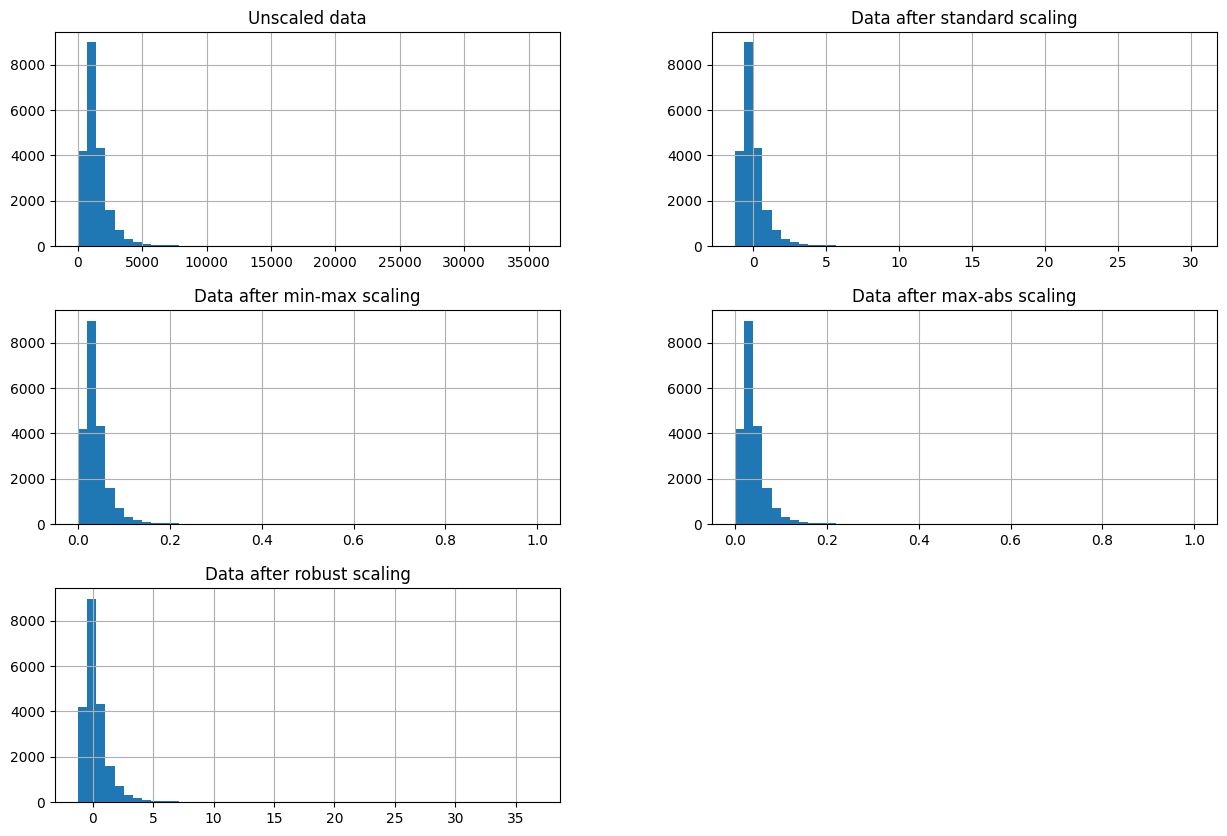

In [5]:
df_scaling.iloc[:, :5].hist(figsize=(15, 10), bins=50);

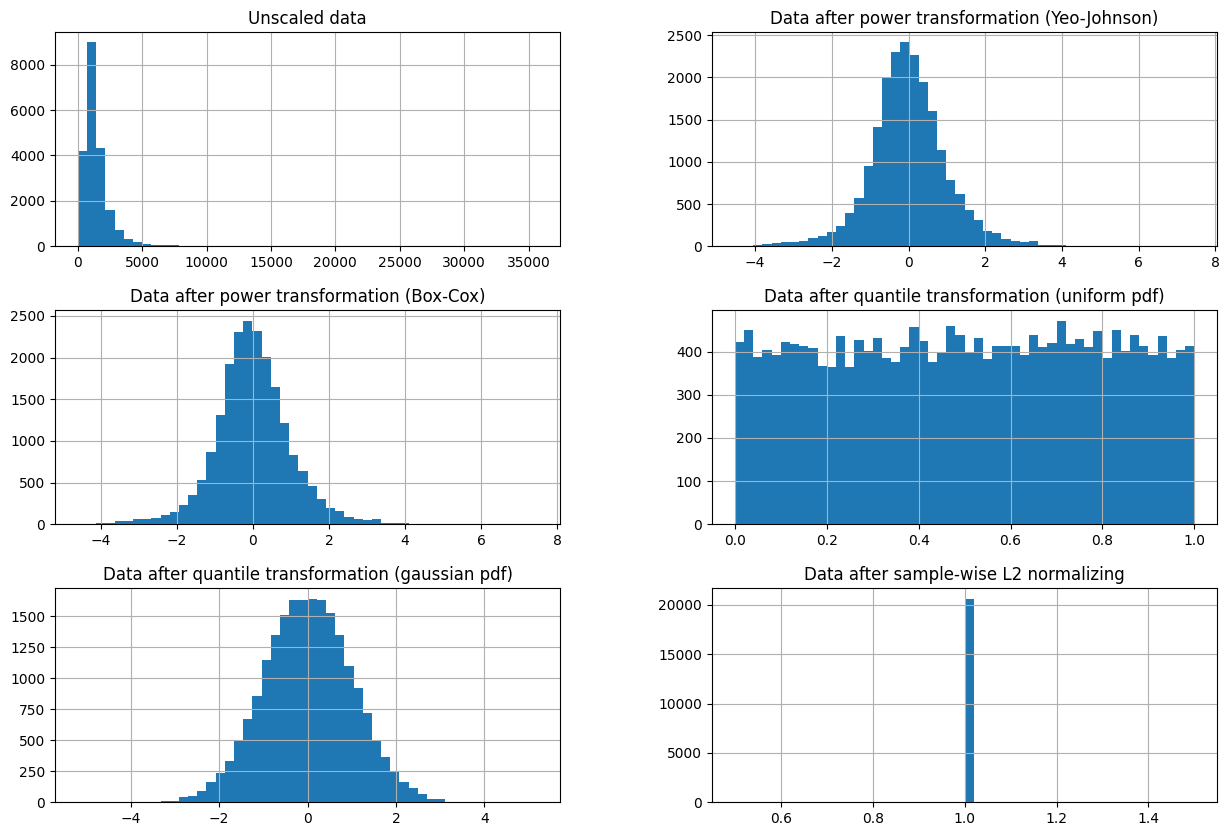

In [6]:
df_scaling.iloc[:, [0, 5, 6, 7, 8, 9]].hist(figsize=(15, 10), bins=50);

In [7]:
df_desc = df_scaling.describe()
df_desc.T.style.background_gradient(axis=0).format("{:.4f}")

,count,mean,std,min,25%,50%,75%,max
Unscaled data,20640.0000,1425.4767,1132.4621,3.0000,787.0000,1166.0000,1725.0000,35682.0000
Data after standard scaling,20640.0000,-0.0000,1.0000,-1.2561,-0.5638,-0.2291,0.2645,30.2503
Data after min-max scaling,20640.0000,0.0399,0.0317,0.0000,0.0220,0.0326,0.0483,1.0000
Data after max-abs scaling,20640.0000,0.0399,0.0317,0.0001,0.0221,0.0327,0.0483,1.0000
Data after robust scaling,20640.0000,0.2766,1.2073,-1.2399,-0.4041,0.0000,0.5959,36.7974
Data after power transformation (Yeo-Johnson),20640.0000,-0.0000,1.0000,-4.5285,-0.5700,-0.0336,0.5522,7.4506
Data after power transformation (Box-Cox),20640.0000,0.0000,1.0000,-4.6042,-0.5699,-0.0340,0.5517,7.4750
Data after quantile transformation (uniform pdf),20640.0000,0.5025,0.2883,0.0000,0.2548,0.5035,0.7518,1.0000
Data after quantile transformation (gaussian pdf),20640.0000,0.0110,0.9998,-5.1993,-0.6632,0.0113,0.6879,5.1993
Data after sample-wise L2 normalizing,20640.0000,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


<Axes: >

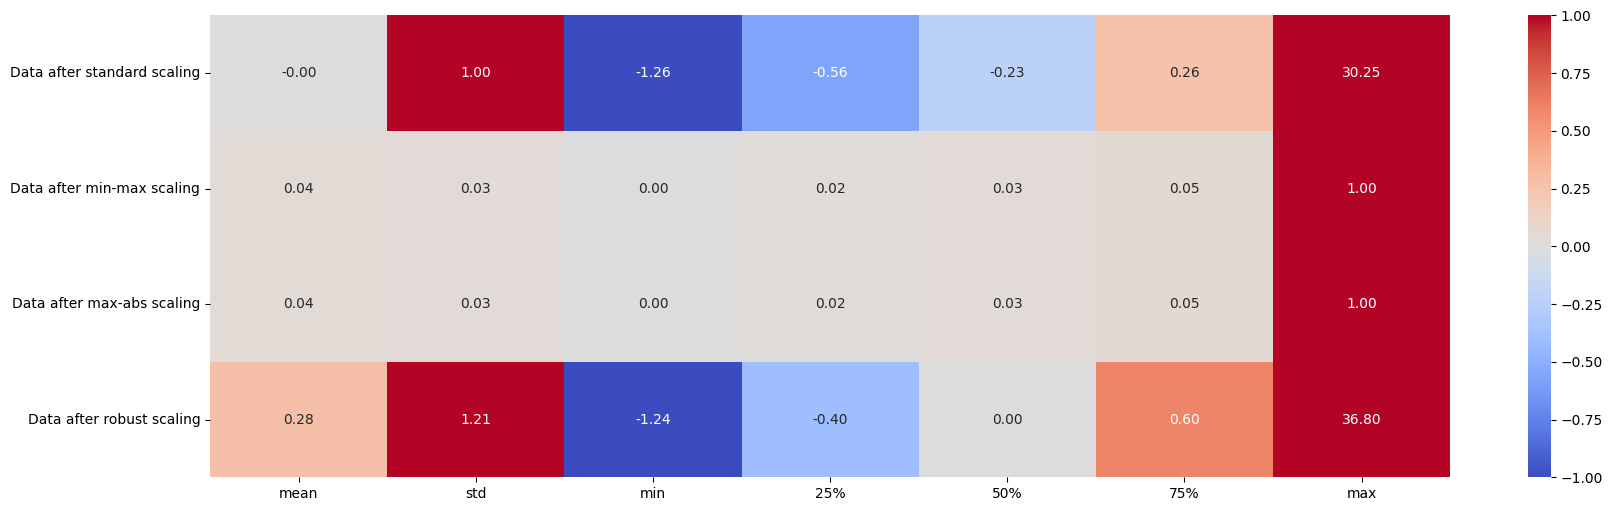

In [8]:
import seaborn as sns
plt.figure(figsize=(20, 6))
sns.heatmap(df_desc.T.iloc[1:5, 1:], annot=True, fmt=".2f", vmax=1, vmin=-1, cmap="coolwarm")

In [9]:
df_scaling.describe().T.iloc[:5].style.format("{:.4f}")

,count,mean,std,min,25%,50%,75%,max
Unscaled data,20640.0000,1425.4767,1132.4621,3.0000,787.0000,1166.0000,1725.0000,35682.0000
Data after standard scaling,20640.0000,-0.0000,1.0000,-1.2561,-0.5638,-0.2291,0.2645,30.2503
Data after min-max scaling,20640.0000,0.0399,0.0317,0.0000,0.0220,0.0326,0.0483,1.0000
Data after max-abs scaling,20640.0000,0.0399,0.0317,0.0001,0.0221,0.0327,0.0483,1.0000
Data after robust scaling,20640.0000,0.2766,1.2073,-1.2399,-0.4041,0.0000,0.5959,36.7974


In [10]:
df_compare = df_scaling[["Unscaled data"]].copy()
df_compare["scaled_std_positive"] = df_scaling[["Data after standard scaling"]] \
+ abs(df_scaling["Data after standard scaling"].min()) + 1

In [11]:
std_after_box_cox = PowerTransformer(method="box-cox").fit_transform(df_compare[["scaled_std_positive"]])

In [12]:
df_compare["Scaling => Transformation"] = std_after_box_cox

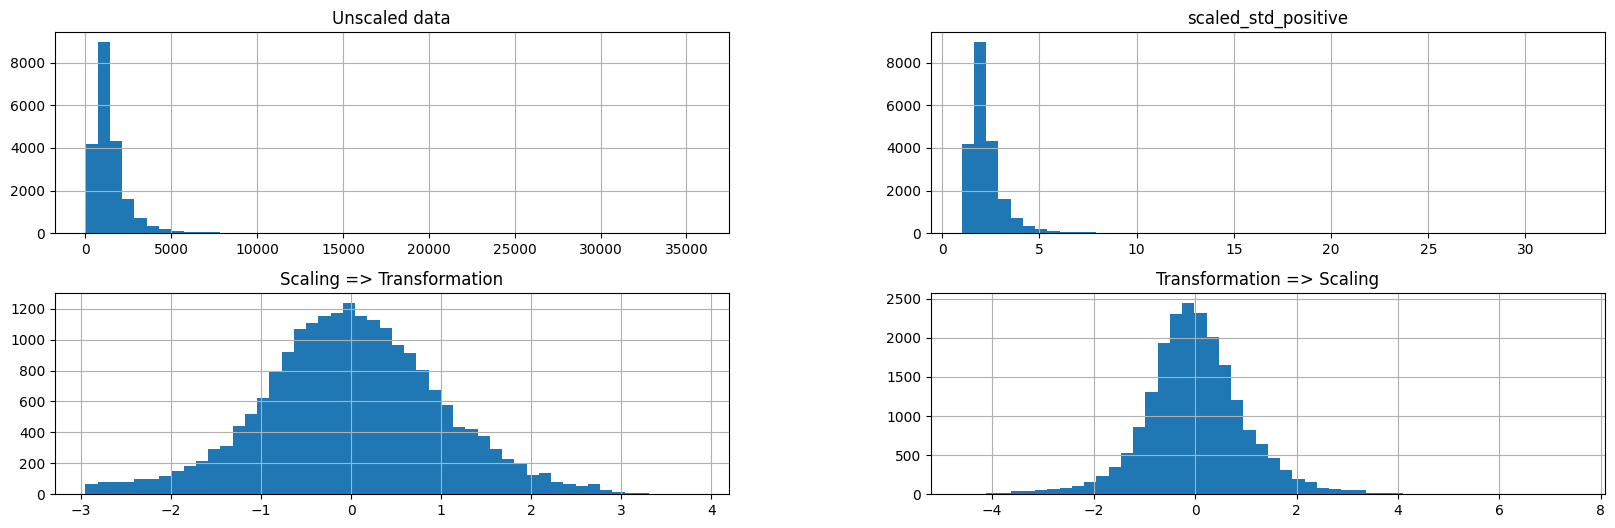

In [13]:
box_cox_after_std = StandardScaler().fit_transform(
    PowerTransformer(method="box-cox").fit_transform(X))
df_compare["Transformation => Scaling"] = box_cox_after_std

df_compare.hist(bins=50, figsize=(20, 6));

In [ ]:
from scipy import stats
# Shapiro-Wilk 검정 수행
stat, p_value = stats.shapiro(df_compare["Scaling => Transformation"])

# 결과 출력
print("Shapiro-Wilk 검정 결과:")
print("통계량(statistic):", stat)
print("p-value:", p_value)


stat, p_value = stats.shapiro(df_compare["Transformation => Scaling"])

# 결과 출력
print("Shapiro-Wilk 검정 결과:")
print("통계량(statistic):", stat)
print("p-value:", p_value)

# p-value를 기준으로 정규성 검정 결과를 해석
alpha = 0.05
if p_value > alpha:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")